**Goal: find what demographics predict each candidate**

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import math

In [13]:
results = pd.read_csv(filepath_or_buffer= '../data/primary_results.csv')
counties = pd.read_csv(filepath_or_buffer= '../data/county_facts.csv')
dictionary = pd.read_csv(filepath_or_buffer= '../data/county_facts_dictionary.csv')

In [4]:
dictionary

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


What's the deomgraphy of Clinton's counties?

In [44]:
#### get Clinton's wins
results_Clinton = results[results['candidate'] == 'Hillary Clinton']
test = [s + ' County' for s in results_Clinton['county'].tolist()]
counties_Clinton = counties[counties['area_name'].isin(test)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1096bd5d0>]], dtype=object)

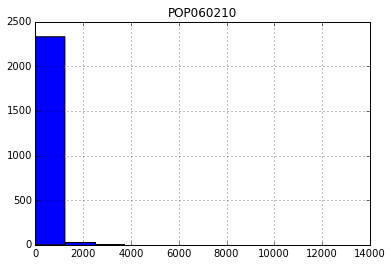

In [45]:
# look at the distribution of the population sizes
pd.DataFrame.hist(counties_Clinton, column = 'POP060210')


In [51]:
# log transform columns that likely differ by order of magnitutde among counties (pop, ares)
to_transform = ['PST045214', 'PST040210', 'POP010210', 'VET605213', 'HSG010214', 'HSD410213',\
               'BZA010213', 'BZA110213', 'BZA110213', 'BZA110213', 'NES010213', 'SBO001207', \
               'SBO001207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN130207', 'RTN131207', \
               'AFN120207', 'BPS030214', 'LND110210', 'POP060210']
for x in to_transform:
    counties_Clinton[x] = np.log(counties_Clinton[x])


/Users/WRShoemaker/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f34bcd0>]], dtype=object)

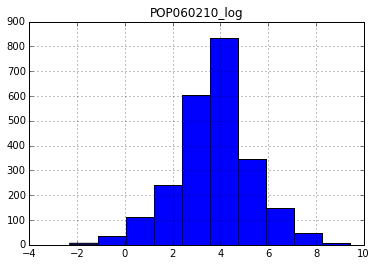

In [50]:
pd.DataFrame.hist(counties_Clinton, column = 'POP060210_log')


In [ ]:
counties_Clinton